In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [22]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [23]:

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.2925 - accuracy: 0.9170 - val_loss: 0.0679 - val_accuracy: 0.9821
Epoch 2/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.0573 - accuracy: 0.9839 - val_loss: 0.0499 - val_accuracy: 0.9848
Epoch 3/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.0508 - val_accuracy: 0.9850
Epoch 4/10
1563/1563 [==============================] - 114s 73ms/step - loss: 0.0258 - accuracy: 0.9928 - val_loss: 0.0425 - val_accuracy: 0.9879
Epoch 5/10
1563/1563 [==============================] - 115s 73ms/step - loss: 0.0166 - accuracy: 0.9957 - val_loss: 0.0425 - val_accuracy: 0.9877
Epoch 6/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0364 - val_accuracy: 0.9892
Epoch 7/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0

In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03667737916111946, 0.9890000224113464]


Giá trị dự đoán:  1


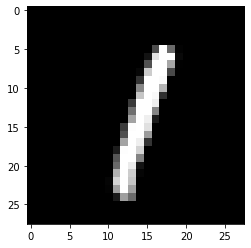

In [47]:
plt.imshow(X_test[5].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[5].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))